In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [232]:
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [233]:
#print(df.shape)
#print(df.info())
print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [234]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [235]:
a,b=df['y'].factorize()

In [236]:
df['conversion']=a

In [237]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


In [238]:
job_wise_conversion_rate_df = df.groupby(by='job')['conversion'].mean()*100

In [239]:
#df.groupby(by='job')['conversion'].count()

#df.groupby(by='job')['conversion'].sum()/df.groupby(by='job')['conversion'].count()
job_wise_conversion_rate_df.head()


job
admin.          12.202669
blue-collar      7.274969
entrepreneur     8.271688
housemaid        8.790323
management      13.755551
Name: conversion, dtype: float64

In [240]:
marital_wise_conversion_rate_df = df.groupby(by='marital')['conversion'].mean()*100

In [241]:
marital_wise_conversion_rate_df.head()

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: conversion, dtype: float64

In [242]:
def barplot(df, x_label='x label', y_label='y label', title='Title'):
    ax = df.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title=title
    )
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()
    

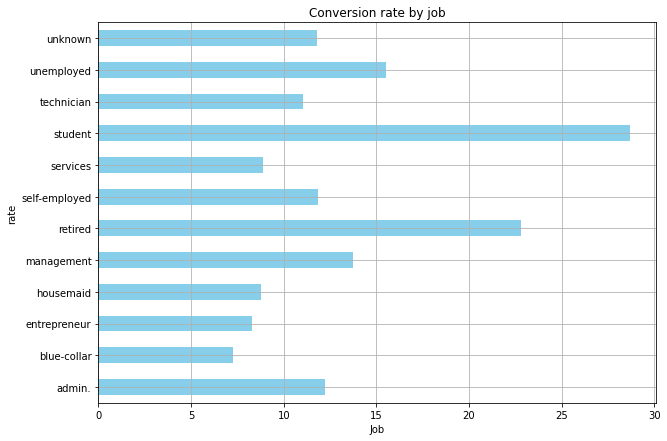

In [243]:
'''
ax = job_wise_conversion_rate_df.plot(
kind='barh',
color='skyblue',
grid=True,
figsize=(10, 7),
title='Conversion Rates by Job'
)
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()
'''
barplot(job_wise_conversion_rate_df,'Job', y_label='rate',title='Conversion rate by job')


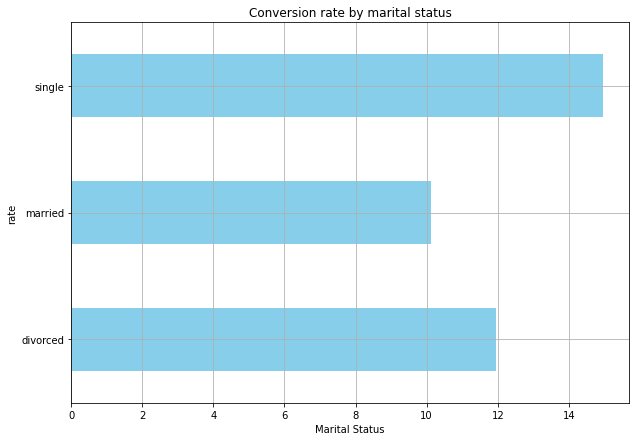

In [244]:
barplot(marital_wise_conversion_rate_df,'Marital Status', y_label='rate',title='Conversion rate by marital status')

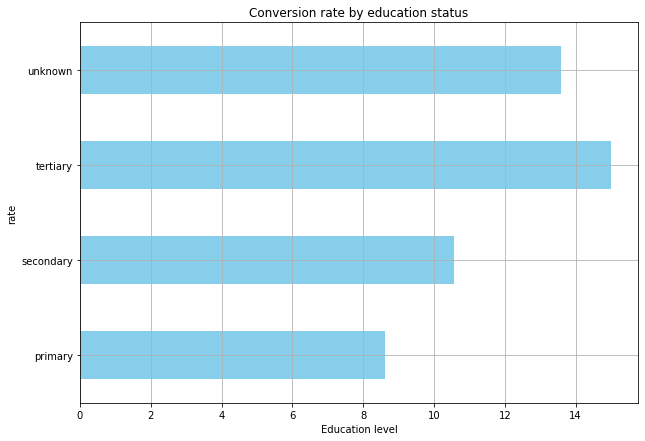

In [245]:
education_wise_conversion_rate_df = df.groupby(by='education')['conversion'].mean()*100
barplot(education_wise_conversion_rate_df,'Education level', y_label='rate',title='Conversion rate by education status')


In [246]:
default_by_conversion_df =  pd.pivot_table(df, index='default', columns='conversion',aggfunc=len,values='y')

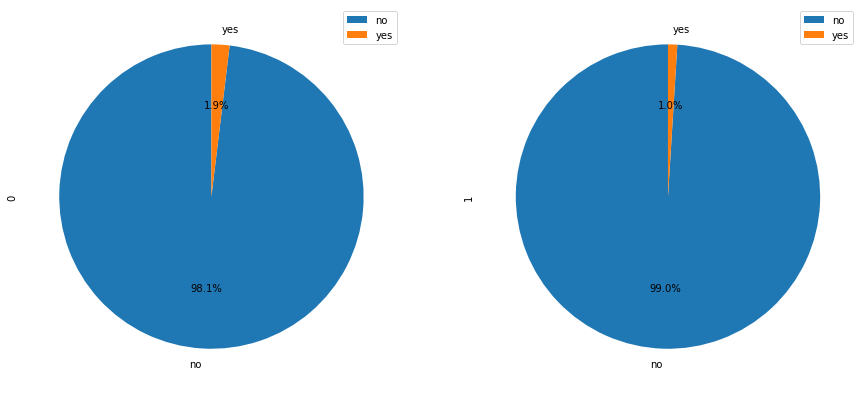

In [247]:
default_by_conversion_df.plot(
kind='pie',
figsize=(15, 7),
startangle=90,
subplots=True,
autopct=lambda x: '%0.1f%%' % x
)
plt.show()

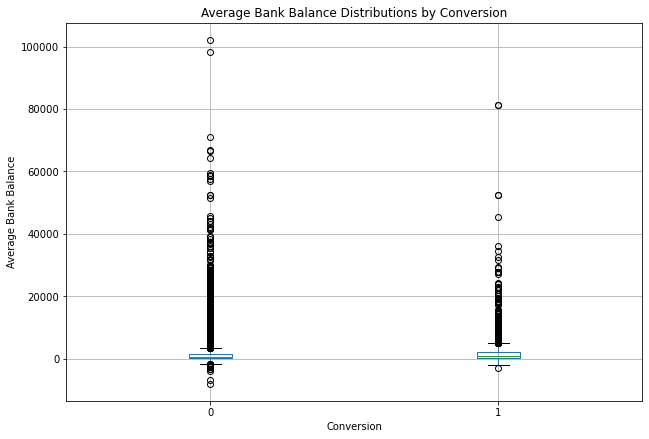

In [248]:
ax = df[['conversion', 'balance']].boxplot(
by='conversion',
showfliers=True,
figsize=(10, 7)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

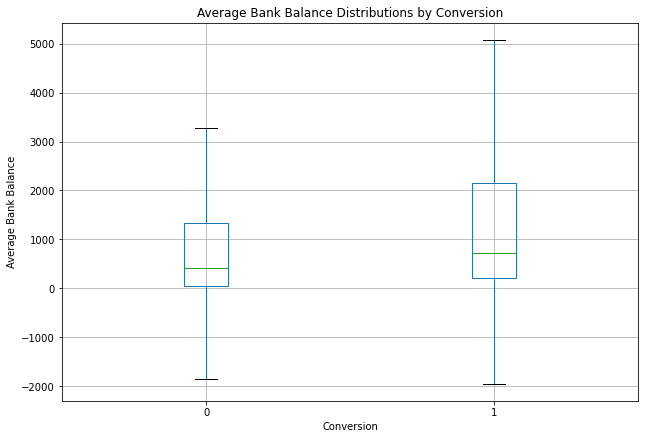

In [249]:
ax = df[['conversion', 'balance']].boxplot(
by='conversion',
showfliers=False,
figsize=(10, 7)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

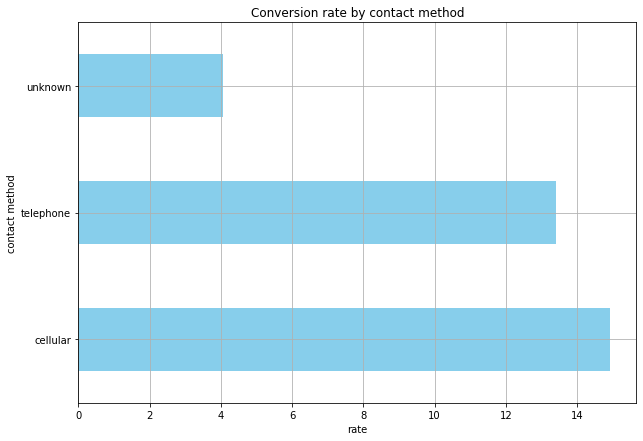

In [250]:
contact_wise_conversion_rate_df = df.groupby(by='contact')['conversion'].mean()*100
barplot(contact_wise_conversion_rate_df,'rate', y_label='contact method',title='Conversion rate by contact method')

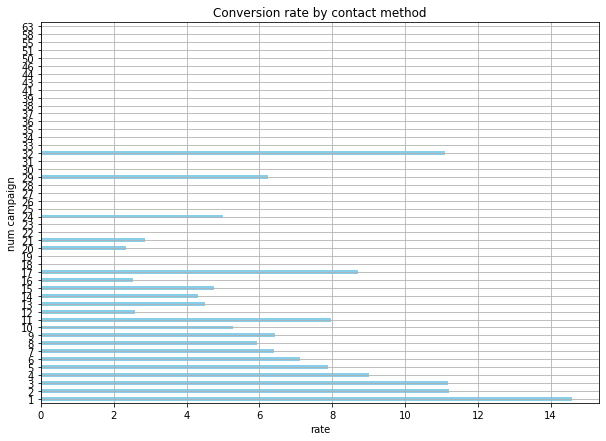

In [251]:
campaign_wise_conversion_rate_df = df.groupby(by='campaign')['conversion'].mean()*100
barplot(campaign_wise_conversion_rate_df,'rate', y_label='num campaign',title='Conversion rate by contact method')

In [252]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [253]:
df.groupby(by = 'month')['conversion'].count()

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: conversion, dtype: int64

In [254]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month_no'] = df['month'].apply(lambda x : months.index(x)+1)



In [255]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion,month_no
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1,11
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1,11
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1,11
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0,11


In [256]:
df.groupby(by = 'month_no')['conversion'].mean()*100

month_no
1     10.121169
2     16.647792
3     51.991614
4     19.679400
5      6.719454
6     10.222805
7      9.093546
8     11.013286
9     46.459413
10    43.766938
11    10.151134
12    46.728972
Name: conversion, dtype: float64

In [257]:
job_df = pd.get_dummies(df['job'])

In [258]:
job_df

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [259]:
df_copy = df.copy()

In [260]:
df = pd.concat([df,job_df],axis= 1)

In [261]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


In [262]:
marital_df = pd.get_dummies(df['marital'])

In [263]:
df = pd.concat([df,marital_df],axis=1)

In [264]:
df.shape

(45211, 34)

In [265]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [266]:
education_order = ['unknown','primary', 'secondary', 'tertiary']
df['education_num']=pd.Categorical(df['education'], education_order).codes

In [267]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,self-employed,services,student,technician,unemployed,unknown,divorced,married,single,education_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,3
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,1,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,1,0,0,1,0


In [268]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df['default'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0)

In [269]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,self-employed,services,student,technician,unemployed,unknown,divorced,married,single,education_num
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,0,0,0,0,0,0,1,0,3
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,0,0,1,0,0,0,0,1,2
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0,0,0,0,0,0,0,1,0,2
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,0,0,0,0,0,0,1,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,...,0,0,0,1,0,0,0,1,0,3
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,...,0,0,0,0,0,0,1,0,0,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,...,0,0,0,0,0,0,0,1,0,2
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,...,0,0,0,0,0,0,0,1,0,2


In [270]:
#df['num_contact'] 
num_contact = pd.get_dummies(df['contact'])

In [271]:
df = pd.concat([df, num_contact],axis=1)

In [272]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'conversion',
       'month_no', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'divorced', 'married',
       'single', 'education_num', 'cellular', 'telephone', 'unknown'],
      dtype=object)

In [273]:

df.drop(['job','marital','contact','month','education'],axis = 1,inplace=True)

In [284]:
outcome = df['conversion'].copy()

In [286]:
df.drop(['poutcome','y','conversion'],axis =1 , inplace= True)

In [298]:
df = pd.concat([df,outcome],axis=1)

In [300]:
df.shape

(45211, 31)

In [301]:
df_copy = df.copy()

In [303]:
#Tree
from sklearn import tree
model = tree.DecisionTreeClassifier(
    max_depth=5
)

In [309]:
X =df.iloc[:,:-1]
y = df.iloc[:,-1]

In [310]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [311]:
import graphviz

In [322]:
features = list(X.columns.values)
len(features)

30

In [323]:
dot_data = tree.export_graphviz(
model,
feature_names=features,
class_names=['0', '1'],
filled=True,
rounded=True,
special_characters=True
)
graph = graphviz.Source(dot_data)

In [326]:
graph.view

<bound method File.view of <graphviz.files.Source object at 0x000002B841617310>>